In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datalatih.csv')
df

,id,nama_balita,nama_orangtua,nomor_orangtua,jenis_kelamin,tanggal_lahir,alamat,nama_wilayah,nama_posyandu,umur,berat_badan,tinggi_badan,label_manual,label
0,1,NADIRA,YUSRI-ENJALINA,2179187676,P,6/10/2021,DICCEKANG,Purwokerto Selatan,Posyandu Anggrek,22.0,10.7,77.0,1,1
1,2,MUH. UKKASYA,BAKRI-SALMIAH,2179187676,L,4/7/2022,DICCEKANG,Purwokerto Selatan,Posyandu Anggrek,13.0,7.0,71.0,1,1
2,3,MUH. FAIZ AL-FATIH,HAERUL-NUDIANA,2179187676,L,23/9/2022,TOMPO BALANG,Purwokerto Selatan,Posyandu Anggrek,11.0,7.0,69.4,1,1
3,4,AHZA RAZID AMANAH,RAHMA-ROSLINA,2179187676,L,17/7/2022,TAMALATE,Purwokerto Selatan,Posyandu Anggrek,13.0,7.1,71.0,1,1
4,5,AINUN PUTRI KHADIJAH,ARDIANSYA-JAMILA,2179187676,P,12/7/2022,TAMMU-TAMMU,Purwokerto Selatan,Posyandu Anggrek,13.0,8.1,68.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,AISYAH PUTRI NABILA,WAHYU HIDAYAT-SAMSINAR,2179187676,P,13/5/2022,TAMMU-TAMMU,Purwokerto Selatan,Posyandu Anggrek,15.0,8.7,73.1,0,0
96,97,NIZAM,ERWIN,2179187676,L,2/8/2022,TAMMU-TAMMU,Purwokerto Selatan,Posyandu Anggrek,12.0,9.6,79.6,0,0
97,98,RIRIN YULIANTI,RUSLAN-SAPARIA,2179187676,P,21/10/2021,TAMMU-TAMMU,Purwokerto Selatan,Posyandu Anggrek,22.0,10.5,79.8,0,0
98,99,IVANYA NATALIE,NATALIE DALLE-SINGGAI,2179187676,P,18/12/2021,TAMMU-TAMMU,Purwokerto Selatan,Posyandu Anggrek,20.0,9.5,77.9,0,0


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(df[['tinggi_badan', 'berat_badan']], df['label_manual'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df[['tinggi_badan', 'berat_badan']], df['label_manual'], test_size=0.1, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8


In [4]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2 2]
 [0 6]]


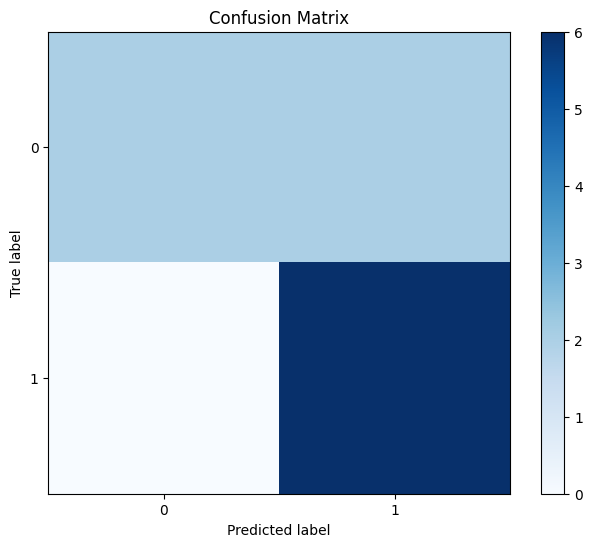

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]  # Assuming 0 means no stunting, and 1 means stunting
tick_marks = classes
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [7]:
import joblib
joblib.dump(model, 'naive_bayes_stunting.pkl')

['naive_bayes_stunting.pkl']

In [8]:
model = joblib.load('naive_bayes_stunting.pkl')
sample_data = pd.DataFrame({'tinggi_badan': [77], 'berat_badan': [11]})
prediction = model.predict(sample_data)
if prediction[0] == 1:
    print('Stunting')
else:
    print('Tidak Stunting')

Stunting
